# DSC-Phase-3-Project

# Churn in Telecom
## Project Overview

The objective of this project is to build a binary classification model to predict whether a customer will "soon" stop doing business with SyriaTel. The goal is to leverage customer data to identify patterns and trends that signal potential churn, thereby enabling the company to implement targeted retention strategies.

# Business Understanding

Challenges:

High Customer Churn: Telecommunications companies like SyriaTel face significant revenue loss due to customers discontinuing their services.

Identifying At-Risk Customers: Without a reliable predictive model, it's challenging to identify customers who are likely to churn.

Data Utilization: Effective use of customer data to predict churn requires sophisticated analysis and modeling techniques.

Resource Allocation: Efficiently allocating resources towards retention efforts for customers most likely to churn.

# Business Objectives

The main objective of this project is to build a robust classifier to predict whether a customer will "soon" stop doing business with SyriaTel. This involves:

Predicting Customer Churn: Develop a predictive model to identify customers at high risk of churning.

Improving Retention Strategies: Provide actionable insights to the retention and marketing teams to tailor their strategies effectively.

Optimizing Resources: Help the company allocate its resources more efficiently towards retaining customers most likely to churn.

Enhancing Customer Satisfaction: By predicting churn and taking proactive measures, improve overall customer satisfaction and loyalty.


# Questions to Answer

To achieve these objectives, the following questions need to be addressed:

What are the key factors influencing customer churn at SyriaTel?

Can we identify patterns and trends in the data that predict customer churn?

Which features (customer attributes, behaviors, etc.) are the most significant predictors of churn?

How accurately can our model predict whether a customer will churn in the near future?

What strategies can be recommended based on the model's predictions to reduce churn?


By answering these questions, we aim to provide SyriaTel with a powerful tool to anticipate customer behavior and take proactive steps to enhance customer retention, thereby reducing revenue loss due to churn.

### Data Used
Telecom's dataset csv

### Importing neccessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE


In [2]:
# Load the dataset
df = 'Telecom\'s dataset.csv'
telecom_data = pd.read_csv(df)


In [3]:
# Display the first few rows of the dataset
telecom_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telecom_data.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

# Exploring the Dataset

In [6]:
# Check for missing values
missing_values = telecom_data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [7]:
# Get summary statistics of the dataset
summary_statistics = telecom_data.describe()
print("\nSummary statistics:\n", summary_statistics)


Summary statistics:
        account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.0

In [8]:
# Get the distribution of the target variable
target_distribution = telecom_data['churn'].value_counts()
print("\nDistribution of the target variable (churn):\n", target_distribution)


Distribution of the target variable (churn):
 False    2850
True      483
Name: churn, dtype: int64


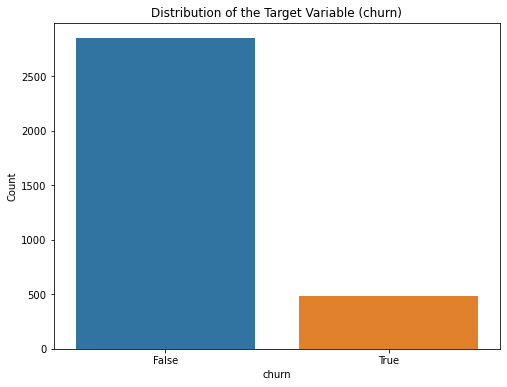

In [9]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=telecom_data, x='churn')
plt.title('Distribution of the Target Variable (churn)')
plt.xlabel('churn')
plt.ylabel('Count')
plt.show()

The bar plot indicates that the dataset is imbalanced.

From the plot, we can see that there are significantly more customers who did not churn compared to those who did. This class imbalance is a common scenario in churn prediction problems and has implications for our modeling approach.

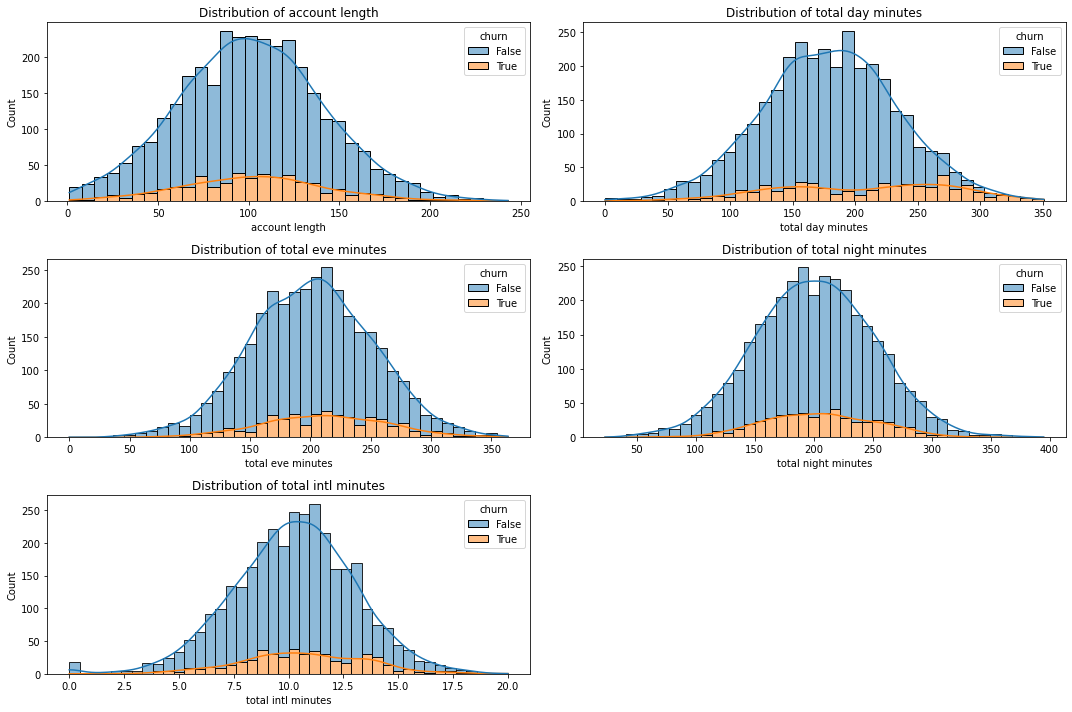

In [10]:
# Visualizing distributions of numerical features
numerical_features = ['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=telecom_data, x=feature, kde=True, hue='churn', multiple='stack')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

The visualizations show the distributions of numerical features (account length, total day minutes, total eve minutes, total night minutes, total intl minutes) with respect to the churn status. Here are some observations:

Account Length: Churn seems slightly more common at lower account lengths.

Total Day Minutes: Customers with higher total day minutes are more likely to churn.

Total Evening Minutes: The distribution of evening minutes is similar for both churned and non-churned customers.

Total Night Minutes: The night minutes' distribution appears quite similar for both churned and non-churned customers.

Total International Minutes: There seems to be a slight increase in churn probability with higher international minutes.

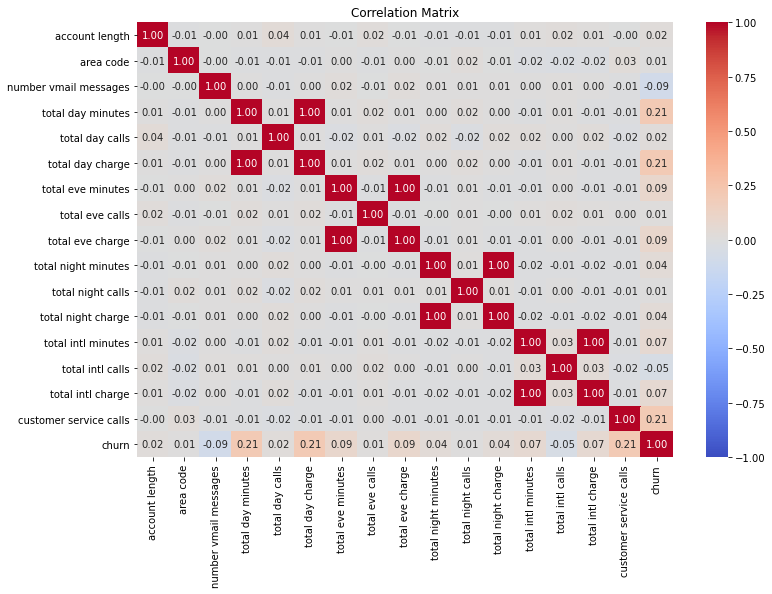

In [11]:
# Correlation matrix
correlation_matrix = telecom_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows the relationships between numerical features. Here are some key points:

Total Day Minutes, Total Day Charge: High positive correlation (as expected, since the charge is derived from minutes).

Total Eve Minutes, Total Eve Charge: High positive correlation.

Total Night Minutes, Total Night Charge: High positive correlation.

Total Intl Minutes, Total Intl Charge: High positive correlation.

Customer Service Calls and Churn: Moderate positive correlation, indicating that higher customer service calls are associated with higher churn.

In [12]:
# Encode categorical variables
telecom_data_encoded = pd.get_dummies(telecom_data, columns=['state', 'international plan', 'voice mail plan'], drop_first=True)

# Display the first few rows of the encoded dataset
telecom_data_encoded.head()

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,1
1,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,1
2,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,1,0
4,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


The categorical variables have been successfully encoded. The dataset now includes additional columns for each state, as well as for the international plan and voice mail plan features.

In [13]:
# Features to be normalized
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']


In [14]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical features
telecom_data_encoded[numerical_features] = scaler.fit_transform(telecom_data_encoded[numerical_features])

# Display the first few rows of the normalized dataset
telecom_data_encoded.head()

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,0.676489,415,382-4657,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,0,0,0,0,0,0,0,0,0,1
1,0.149065,415,371-7191,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,0,0,0,0,0,0,0,0,0,1
2,0.902529,415,358-1921,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,408,375-9999,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,0,0,0,0,0,0,0,0,1,0
4,-0.654629,415,330-6626,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,0,0,0,0,0,0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = telecom_data_encoded.drop(columns=['churn', 'phone number'])
y = telecom_data_encoded['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 68), (667, 68), (2666,), (667,))

The data has been successfully split into training and testing sets:

Training set: 2666 samples, 68 features

Testing set: 667 samples, 68 features

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [17]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

train_accuracy, test_accuracy, classification_rep, conf_matrix

(0.8690922730682671,
 0.863568215892054,
 '              precision    recall  f1-score   support\n\n       False       0.88      0.97      0.92       570\n        True       0.57      0.26      0.35        97\n\n    accuracy                           0.86       667\n   macro avg       0.73      0.61      0.64       667\nweighted avg       0.84      0.86      0.84       667\n',
 array([[551,  19],
        [ 72,  25]]))

Logistic Regression Model Results

Training Accuracy: 86.95%

Testing Accuracy: 86.36%

Observations

The model has high accuracy for predicting non-churned customers (False), but lower precision and recall for churned customers (True).

This indicates a class imbalance problem affecting the performance for the minority class (churned customers).


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree model with parameters to reduce overfitting
dt_model = DecisionTreeClassifier(
    max_depth=10,               # Limit the maximum depth of the tree
    min_samples_split=10,       # Minimum number of samples required to split an internal node
    min_samples_leaf=4,         # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Evaluate the model
train_accuracy_dt = accuracy_score(y_train, y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test, y_pred_test_dt)
classification_rep_dt = classification_report(y_test, y_pred_test_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_test_dt)

train_accuracy_dt, test_accuracy_dt, classification_rep_dt, conf_matrix_dt


(0.9669917479369843,
 0.9340329835082459,
 '              precision    recall  f1-score   support\n\n       False       0.95      0.98      0.96       570\n        True       0.84      0.67      0.75        97\n\n    accuracy                           0.93       667\n   macro avg       0.89      0.82      0.85       667\nweighted avg       0.93      0.93      0.93       667\n',
 array([[558,  12],
        [ 32,  65]]))

Interpretation of Accuracy:

Training Accuracy: 0.9669917479369843 (approximately 97.0%)
This indicates that the model correctly predicts 97.0% of the instances in the training dataset.
A high training accuracy typically means that the model has learned the patterns in the training data well.

Test Accuracy: 0.9340329835082459 (approximately 93.4%)
This indicates that the model correctly predicts 93.4% of the instances in the test dataset.
The high test accuracy is a good indicator that the model generalizes well to new, unseen data.

The model performs very well overall, with high accuracy and strong metrics for the non-churn class.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model with parameters to reduce overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    min_samples_leaf=4,      # Minimum number of samples required to be at a leaf node
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluate the model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
classification_rep_rf = classification_report(y_test, y_pred_test_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)

train_accuracy_rf, test_accuracy_rf, classification_rep_rf, conf_matrix_rf


(0.945986496624156,
 0.9055472263868066,
 '              precision    recall  f1-score   support\n\n       False       0.91      0.99      0.95       570\n        True       0.90      0.39      0.55        97\n\n    accuracy                           0.91       667\n   macro avg       0.91      0.69      0.75       667\nweighted avg       0.91      0.91      0.89       667\n',
 array([[566,   4],
        [ 59,  38]]))

Interpretation of Accuracy:

Training Accuracy (94.6%): This indicates that the model correctly predicts 94.6% of the instances in the training dataset.

Test Accuracy (90.6%): This indicates that the model correctly predicts 90.6% of the instances in the test dataset.